## Dataset Preperation

In [73]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image

In [74]:
p = Path("../datasets/images")

labels_dict={'cat':0, 'dog':1, 'horse':2, 'human':3}
image_data = []
labels = []
dirs = p.glob("*")
for folder_dir in dirs:
    label = str(folder_dir).split('/')[-1][:-1]
    print(label)
    

    
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path, target_size=(32, 32))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
        
        

cat
horse
dog
human


In [75]:
print(len(image_data))
print(len(labels))

808
808


In [76]:
# Convert data into numpy array
image_data = np.array(image_data, dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape, labels.shape)

(808, 32, 32, 3) (808,)


### Shuffle the data

In [77]:
import random

combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

### Visualize the data

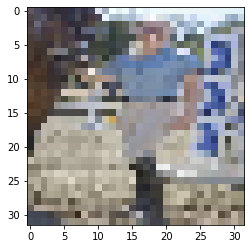

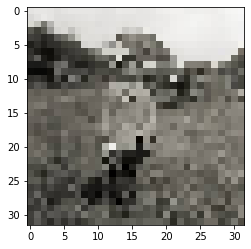

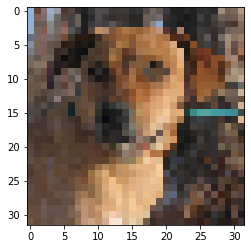

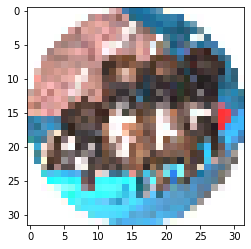

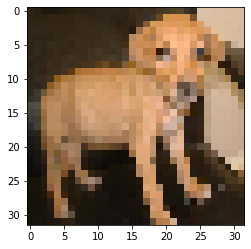

In [78]:
def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.show()
    return

for i in range(5):
    drawImg(image_data[i])

### SVM Classifier

In [79]:
# Convert data for One VS One classification

image_data = image_data.reshape(image_data.shape[0], -1)
print(image_data.shape)

(808, 3072)


In [90]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

svc.fit(image_data, labels)

SVC(kernel='linear')

In [91]:
svc.score(image_data, labels)

0.6497524752475248